<div style="width: 100%; clear: both;">

<div style="float: left; width: 50%;">

<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">

</div>

<div style="float: right; width: 50%;">

<p style="margin: 0; padding-top: 22px; text-align:right;">M2.991 · Aprenentatge automàtic · PAC1</p>

<p style="margin: 0; text-align:right;">2024-1 · Màster universitari en Ciència de dades (Data science)</p>

<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>

</div>

</div>

<div style="width:100%;">&nbsp;</div>

<div style="text-align: center; font-size: 36px; font-weight: bold;">
  PAC 1: Preparació de dades
</div>

L'objectiu principal d'aquesta primera PAC és que us familiaritzeu amb l'entorn de treball que utilitzareu en la resta de pràctiques de l'assignatura. Aquest entorn estarà format per un conjunt de dependències relatives a certs mòduls de Python que seran necessaris per poder executar la vostra PAC de manera correcta. Aquestes dependències les gestionarem gràcies a l'ajuda d'Anaconda. Una altra de les eines fonamentals del que serà el vostre nou entorn de treball serà Jupyter, que us permetrà treballar amb Notebooks (fitxers *.ipynb) com el present enunciat.

Un altre dels aspectes més importants que cobrirem en aquesta primera PAC, tal com indica el títol, és el de la preparació de les dades. En aquesta PAC aprendrem a carregar un conjunt de dades o _dataset_ i ens ajudarem d'eines de visualització per comprendre millor com es distribueixen les dades amb l'objectiu d'entendre com podem treure'n profit. A més, ens acostumarem a treballar amb conjunts d'entrenament i de prova per confirmar si les conclusions que traiem sobre una part de les mostres es poden generalitzar i extrapolar a la resta.

En resum, en aquesta pràctica veurem com aplicar diferents tècniques per a la càrrega i preparació de dades seguint els passos llistats a continuació:
1. Càrrega d'un conjunt de dades (1 punt)
2. Anàlisi de les dades (2.5 punts)
<br>   2.1. Anàlisi estadístic bàsic
<br>   2.2. Anàlisi exploratori de les dades
3. Preprocessament de les dades (1.5 punts)
4. Reducció de la dimensionalitat (2.5 punts)
5. Conjunts desbalancejats de dades (2.5 punts)
<br>   5.1. _Oversampling_

**Important:** cada un dels exercicis pot suposar diversos minuts d'execució, per la qual cosa l'entrega s'ha de fer en format notebook i en format html, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a html des del menú File $\to$ Download as $\to$ HTML.

**Important:** existeix un tipus de cel·la especial per a albergar text. Aquest tipus de cel·la us serà molt útil per respondre a les diferents preguntes teòriques plantejades al llarg de cada PAC. Per canviar el tipus de cel·la a aquest tipus, escolliu en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Important:** la solució plantejada no ha d'utilitzar mètodes, funcions o paràmetres declarats "deprecated" en futures versions.

**Important:** no oblideu posar el vostre nom i cognoms a la següent cel·la.

<div class="alert alert-block alert-info">
<strong>Nom i cognoms: Toni Vives Cabaleiro</strong>
</div>

Toni Vives Cabaleiro

Per la realització de la pràctica, necessitarem importar els següents mòduls:

In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# Càrrega del conjunt de dades (1 punt)

Al llarg de tota la PAC treballarem amb el conjunt de dades anomenat _Bank Marketing_, que és un dels _datasets_ disponibles al [Repositori d'Aprenentatge Automàtic de la Universitat de Califòrnia a Irvine](https://archive.ics.uci.edu/).

A l'enllaç [https://archive.ics.uci.edu/dataset/222/bank+marketing] teniu disponible tant el conjunt de dades _Bank Marketing_ esmentat com tota la informació rellevant necessària per comprendre millor amb quin tipus de dades treballarem. En resum, les dades d'aquest _dataset_ estan relacionades amb campanyes de màrqueting directe (trucades telefòniques) d'una institució bancària portuguesa. L'objectiu que es busca en aquest conjunt de dades és predir si el client contractarà un dipòsit a termini o no (variable _y_).

En primer lloc, haureu de carregar al Notebook el conjunt de dades amb el qual treballarem durant la resta de la PAC. Per fer-ho, podeu descarregar-lo manualment des de l'enllaç referit prèviament, tot i que us aconsellem que instal·leu i utilitzeu el mòdul _ucimlrepo_ tal com s'explica a la pàgina del _dataset_.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> carregueu el conjunt de dades "Bank Marketing" i mostreu:

<ul>
  <li>El nombre i els noms dels atributs descriptius (variables que podrien ser utilitzades per predir la variable objectiu "y").</li>
  <li>El nombre de files (mostres) del conjunt de dades.</li>
  <li>Verifiqueu si hi ha "missing values", i si és així, en quines columnes.</li>
</ul>

Suggeriment: si utilitzeu ucimlrepo, exploreu els atributs _metadata_ i _variables_ de l'objecte obtingut.
    
Suggeriment: separeu el conjunt de dades original en les variables "X" (atributs descriptius) i "y" (variable objectiu), tot i que potser us sigui útil en algun moment tenir-les també en un únic DataFrame combinat.
</div>

Començarem analitzant la informació que ens mostra el propi dataset en el repositori d'Aprenentatge Automàtic de la Universitat de Califòrnia a Irvine:

### Taula de variables

| Nom de la variable | Rol            | Tipus     | Demogràfic        | Descripció                                                                                                                             | Unitats | Valors faltants |
|--------------------|----------------|-----------|-------------------|----------------------------------------------------------------------------------------------------------------------------------------|---------|-----------------|
| edat               | Característica  | Enter     | Edat              |                                                                                                                                         |         | No              |
| feina              | Característica  | Categòric | Ocupació          | Tipus de feina (categòric: 'administrador', 'obrer', 'empresari', 'empleat domèstic', 'gerent', 'jubilat', 'autònom', 'serveis', 'estudiant', 'tècnic', 'aturat', 'desconegut') |         | No              |
| estat civil        | Característica  | Categòric | Estat civil       | Estat civil (categòric: 'divorciat', 'casat', 'solter', 'desconegut'; nota: 'divorciat' significa divorciat o vidu)                    |         | No              |
| educació           | Característica  | Categòric | Nivell d'educació | (categòric: 'bàsic.4a', 'bàsic.6a', 'bàsic.9a', 'batxillerat', 'analfabet', 'curs professional', 'títol universitari', 'desconegut')    |         | No              |
| per defecte        | Característica  | Binari    |                   | Té crèdit en mora?                                                                                                                      |         | No              |
| saldo              | Característica  | Enter     |                   | Saldo mitjà anual                                                                                                                       | euros   | No              |
| habitatge          | Característica  | Binari    |                   | Té préstec hipotecari?                                                                                                                  |         | No              |
| préstec            | Característica  | Binari    |                   | Té préstec personal?                                                                                                                    |         | No              |
| contacte           | Característica  | Categòric |                   | Tipus de comunicació de contacte (categòric: 'mòbil', 'telèfon')                                                                        |         | Sí              |
| dia_de_la_setmana  | Característica  | Data      |                   | Últim dia de contacte de la setmana                                                                                                     |         | No              |
| mes                | Característica  | Data      |                   | Últim mes de contacte de l'any (categòric: 'gen', 'feb', 'mar', ..., 'nov', 'des')                                                      |         | No              |
| durada             | Característica  | Enter     |                   | Durada de l'últim contacte, en segons (numèric). Nota: Aquest atribut afecta considerablement el resultat final. Si la durada és 0, el resultat és "no". Aquesta entrada s'ha d'incloure només amb finalitats de referència i s'ha de descartar si es vol un model predictiu realista. |         | No              |
| campanya           | Característica  | Enter     |                   | Nombre de contactes realitzats durant aquesta campanya i per aquest client (numèric, inclou l'últim contacte)                           |         | No              |
| dies de pau        | Característica  | Enter     |                   | Nombre de dies des que es va contactar per última vegada al client d'una campanya anterior (numèric; -1 significa que el client no va ser contactat prèviament) |         | Sí              |
| anterior           | Característica  | Enter     |                   | Nombre de contactes realitzats abans d'aquesta campanya i per aquest client.                                                            |         | No              |
| resultat           | Característica  | Categòric |                   | Resultat de la campanya de màrqueting anterior (categòric: 'fracàs', 'inexistent', 'èxit')                                              |         | Sí              |
| y                  | Objectiu       | Binari    |                   | El client ha subscrit un dipòsit a termini?                                                                                             |         | No              |


In [27]:
# importem el dataset
# Atenent a que el repositori entrega 4 datasets, agafarem el de "bank-additional-full.csv", doncs es el que conté més dades.

df = pd.read_csv("bank-additional-full.csv",delimiter=';')
df.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Com podem observar, les dades venen separades per ";", per això li hem afegit el delimiter, ja que per default el valor que porta es "/t".

In [32]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [40]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> El conjunt de dades proposat correspon a un problema d'aprenentatge automàtic supervisat o no?; Si és el cas, de quin tipus d'aprenentatge supervisat estaríem parlant?
</div>

# Anàlisi de les dades (2.5 punts)

En aquest apartat visualitzarem cadascuna de les columnes o _features_ del conjunt de dades per comprendre millor quina distribució tenen.

## Anàlisi estadística bàsica

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> realitzeu un anàlisi estadística bàsica: 
<ul>
  <li>Variables categòriques:</li>
     <ul>
      <li>Calculeu la freqüència.</li>
      <li>Feu un gràfic de barres per cada variable.</li>
    </ul>
  <li>Variables numèriques:</li>
    <ul>
      <li>Calculeu estadístics descriptius bàsics: mitjana, mediana, desviació estàndard, ...</li>
      <li>Feu un histograma per a cada variable.</li>
    </ul>
</ul>
Suggeriment: podeu utilitzar la llibreria "pandas" i les seves funcions "describe" i "value_counts", així com les funcions "bar", "hist" i "hist2d" de <i>matplotlib</i>.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> comenteu els resultats.
</div>

## Anàlisi exploratòria de les dades

En aquest subapartat explorarem gràficament la relació dels atributs descriptius amb la variable objectiu i analitzarem les diferents correlacions.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> utilitzant una llibreria gràfica, com ara <i>matplotlib</i>, per a cadascuna de les variables categòriques, superposeu en un mateix gràfic el diagrama de barres per a cada valor possible de la variable objectiu, diferenciant amb un color diferent segons el valor de "y", és a dir, quan sigui "no" o quan sigui "yes". Afegiu una llegenda per saber a quina classe correspon cada histograma.
    
La finalitat és observar com es distribueix cadascun dels atributs en funció de la classe que tenen, per poder identificar de manera visual i ràpida si alguns atributs ens permeten predir millor que altres el valor de la variable objectiu.
    
<hr>
Suggeriment: podeu utilitzar el paràmetre "alpha" en els gràfics perquè es puguin apreciar els dos histogrames.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> de la mateixa manera que en l'exercici anterior, superposeu els histogrames per als diferents valors de "y" per a cada variable numèrica.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong>
<br> Mirant els gràfics de barres i els histogrames, quins atributs semblen tenir més pes al moment de predir si es contractarà un dipòsit a termini o no? Creus que amb aquests atributs serà suficient per poder determinar si es contractarà o no el dipòsit?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> calculeu i mostreu la correlació entre les variables numèriques.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> comenta els resultats.
</div>

# Preprocessament de les dades (1.5 punts)

Un cop analitzats els atributs descriptius, és el moment de preparar-los perquè ens siguin útils amb vista a predir valors.

A partir d’aquest punt, per simplicitat, treballarem únicament amb els atributs numèrics.

En aquest apartat:
<li>Estandarditzarem (o normalitzarem) els valors dels atributs descriptius numèrics perquè les seves escales no siguin molt diferents.</li>
<li>Separarem el conjunt de dades original en dos subconjunts: entrenament i test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> quina tècnica podríem fer servir per codificar els atributs categòrics de format numèric?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> conserva els atributs descriptius numèrics i estandarditza’ls, aquest serà el nou conjunt d’atributs descriptius amb el qual treballarem a partir d’ara.
<hr>
Suggeriment: utilitzeu "StandardScaler" de <i>preprocessing</i>.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> separa els atributs descriptius escalats i la variable objectiu en els subconjunts d’entrenament i de prova.
<hr>
Suggeriment: per separar entre entrenament i prova podeu utilitzar "train_test_split" de sklearn.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> valora si la decisió de transformar el conjunt de dades (estandardització) abans de realitzar la separació del conjunt de dades en els subconjunts d’entrenament i prova, és una bona idea.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> en aquest exercici hem estandarditzat els valors dels atributs descriptius perquè les seves escales no siguin molt diferents (unificar-les). Què ens aporta estandarditzar els atributs descriptius?, hi ha alguna situació o escenari on sigui imprescindible?
</div>

# Reducció de la dimensionalitat (2.5 punts)

En aquest apartat reprendrem l'anàlisi gràfica de la distribució de la classe al llarg de les mostres del conjunt de dades. En el segon apartat vam poder observar si les variables descriptives per separat eren molt prometedores o no per predir la classe. Aquí intentarem determinar si la seva combinació pot ajudar-nos a establir si es contractarà el dipòsit de manera més eficaç que utilitzant els atributs per separat. Amb aquest propòsit, reduirem la dimensionalitat del problema a només dos atributs, que seran la projecció dels atributs descriptius originals, i observarem com es distribueixen les mostres de cada classe.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong><br>
<ul>
    <li>Aplica el mètode de reducció de la dimensionalitat Principal Component Analysis (PCA) per reduir a 2 dimensions el conjunt de dades complet amb tots els atributs (*features*).</li>
    <li>Genera un gràfic en 2D amb el resultat del PCA utilitzant colors diferents per a cadascuna de les classes de la resposta, amb l'objectiu de visualitzar si és possible separar eficientment les classes amb aquest mètode.</li>
</ul>
    
NOTA: Tingueu cura de no incloure la variable objectiu en la reducció de dimensionalitat. Volem explicar la variable objectiu en funció de la resta de variables reduïdes a dues dimensions.

<hr>
Suggeriment: no és necessari que programeu l'algorisme de PCA, podeu utilitzar la implementació disponible a la llibreria de <i>scikit-learn</i>.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong><br>
<ul>
    <li>Repeteix la reducció de la dimensionalitat, però en aquest cas utilitzant TSNE. Podeu trobar més informació sobre aquest algorisme en l'enllaç: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Igual que abans, genereu un gràfic en 2D amb el resultat del TSNE fent servir colors diferents per a cadascuna de les classes de la resposta (y), amb l'objectiu de visualitzar si és possible separar eficientment les classes amb aquest mètode.</li>
</ul>

<hr>
Suggeriment: no és necessari que programeu l'algorisme TSNE, podeu fer servir la implementació disponible a la llibreria de <i>scikit-learn</i>.<br>
Suggeriment: a part d'especificar el nombre de components, proveu els paràmetres "learning_rate" i "perplexity".<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> observant els dos gràfics, consideres que la reducció de dimensionalitat ha funcionat bé?. Ha aconseguit separar les classes correctament?. Quin dels dos mètodes ha funcionat millor?. Per què obtenim resultats tan diferents?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> Què en penses de TSNE com a opció per reduir la dimensionalitat? Què et sembla que només tingui el mètode "fit_transform" però no tingui "transform"? Coneixes alguna altra opció que, amb prestacions similars, eviti els problemes que té TSNE?
</div>

# Conjunts desequilibrats de dades (2.5 punts)

En els problemes de classificació, és molt comú trobar conjunts de dades molt desequilibrats. En la indústria existeixen múltiples exemples, com ara la detecció de frau o la fuga de clients. Aquest apartat se centra en l’anàlisi d’aquest tipus de conjunts.

El cas del _dataset_ amb el qual estem treballant (_Bank Marketing_) és un d’ells, ja que podem observar com la classe "no" apareix amb una freqüència fins a deu vegades més gran que la classe "yes".

A continuació, analitzarem la distribució del nostre conjunt de dades. Per fer-ho, farem servir la funció <strong>show_distribution</strong> definida a la següent cel·la:

In [21]:
def show_distribution(y_df):
    freq = y_df["y"].value_counts()
    plt.pie(freq, labels=('No subscription ('+str(freq["no"])+')', 'Subscription ('+str(freq["yes"])+')'), autopct='%1.1f%%')
    plt.title("Term deposit subscription distribution")
    plt.show()

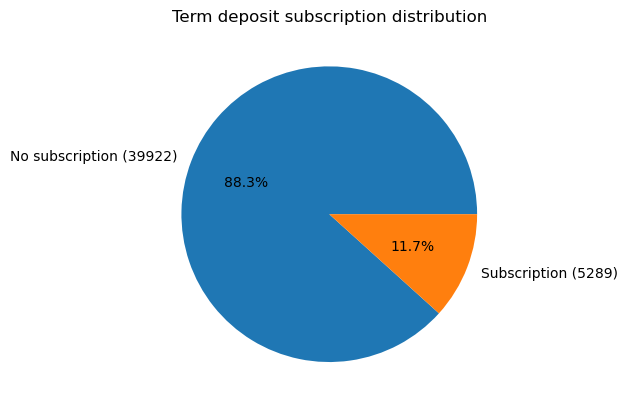

In [22]:
show_distribution(y)

Com es pot observar, el conjunt està força desequilibrat, ja que, pràcticament, només una desena part de les mostres corresponen a la contractació del dipòsit.

Per tractar el problema de dades desequilibrades, analitzarem la tècnica de sobremostreig (_oversampling_) de la classe minoritària. A la literatura hi ha més tècniques per afrontar aquest problema, com el submostreig (_undersampling_) de la classe majoritària, però en aquesta PAC, ens centrarem només en la tècnica de sobremostreig.

## Oversampling

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> incrementeu les mostres de la classe minoritària fins a arribar a un nombre similar al dels elements de la classe majoritària aplicant les tècniques següents:
<ul>
    <li>Duplicació aleatòria (_random over-sampling_), fixant random_state=10.</li>
    <li>SMOTE (_Synthetic Minority Over-sampling Technique_), fixant random_state=10.</li>
    <li>ADASYN (_Adaptive Synthetic Sampling_), fixant random_state=10.</li>
</ul>
    
Per acabar, verifiqueu amb l’ajuda de la funció <strong>show_distribution</strong>, que després de l’aplicació d’aquestes tècniques, el nombre de mostres de la classe minoritària s’ha igualat al de la majoritària.
<hr>
Suggeriment: per aplicar la replicació aleatòria podeu fer servir "RandomOverSampler" d'<i>imblearn</i>.<br>
Suggeriment: per aplicar SMOTE podeu utilitzar "SMOTE" d'<i>imblearn</i>.<br>
Suggeriment: per aplicar ADASYN podeu utilitzar "ADASYN" d'<i>imblearn</i>.<br>
</div>

El resultat d'aplicar aquestes tècniques hauria d'haver produit un nombre similar de mostres per a les dues classes. No obstant això, cadascun dels mètodes genera les noves mostres de la classe minoritària de manera diferent. Amb l'objectiu de comprendre millor i de manera visual com es generen aquestes noves mostres, a partir d'ara, farem servir la descomposició a dues dimensions que hagi mostrat un millor comportament a l'apartat anterior.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> mostreu, amb un gràfic de dispersió en funció de les dues components resultants de la reducció dimensional prèvia, la distribució de les contractacions del conjunt de dades original, i del que s'ha obtingut després d'aplicar Random Over Sampling.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Quines diferències i similituds trobes en les dues imatges anteriors? Justifiqueu la resposta tenint en compte la distribució d’ambdós conjunts, és a dir, la quantitat d’avaries de motor.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> mostreu, amb un gràfic de dispersió en funció de les dues components resultants de la reducció dimensional prèvia, la distribució de les contractacions dels tres conjunts de dades obtinguts en aplicar les tres tècniques de sobremostreig.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> considerant el nombre de mostres amb contractació en cada conjunt, comenteu les diferències i semblances a les imatges de l’exercici anterior. Justifiqueu la resposta tenint en compte el comportament de cadascuna de les tècniques utilitzades.
</div>